In [1]:
from yty_manim.application.page_replacement import *
from yty_manim.basic_unit.squ_tex import *
from yty_manim.basic_unit.screen_cycle import *
from manim import *

Manim Community v0.18.0

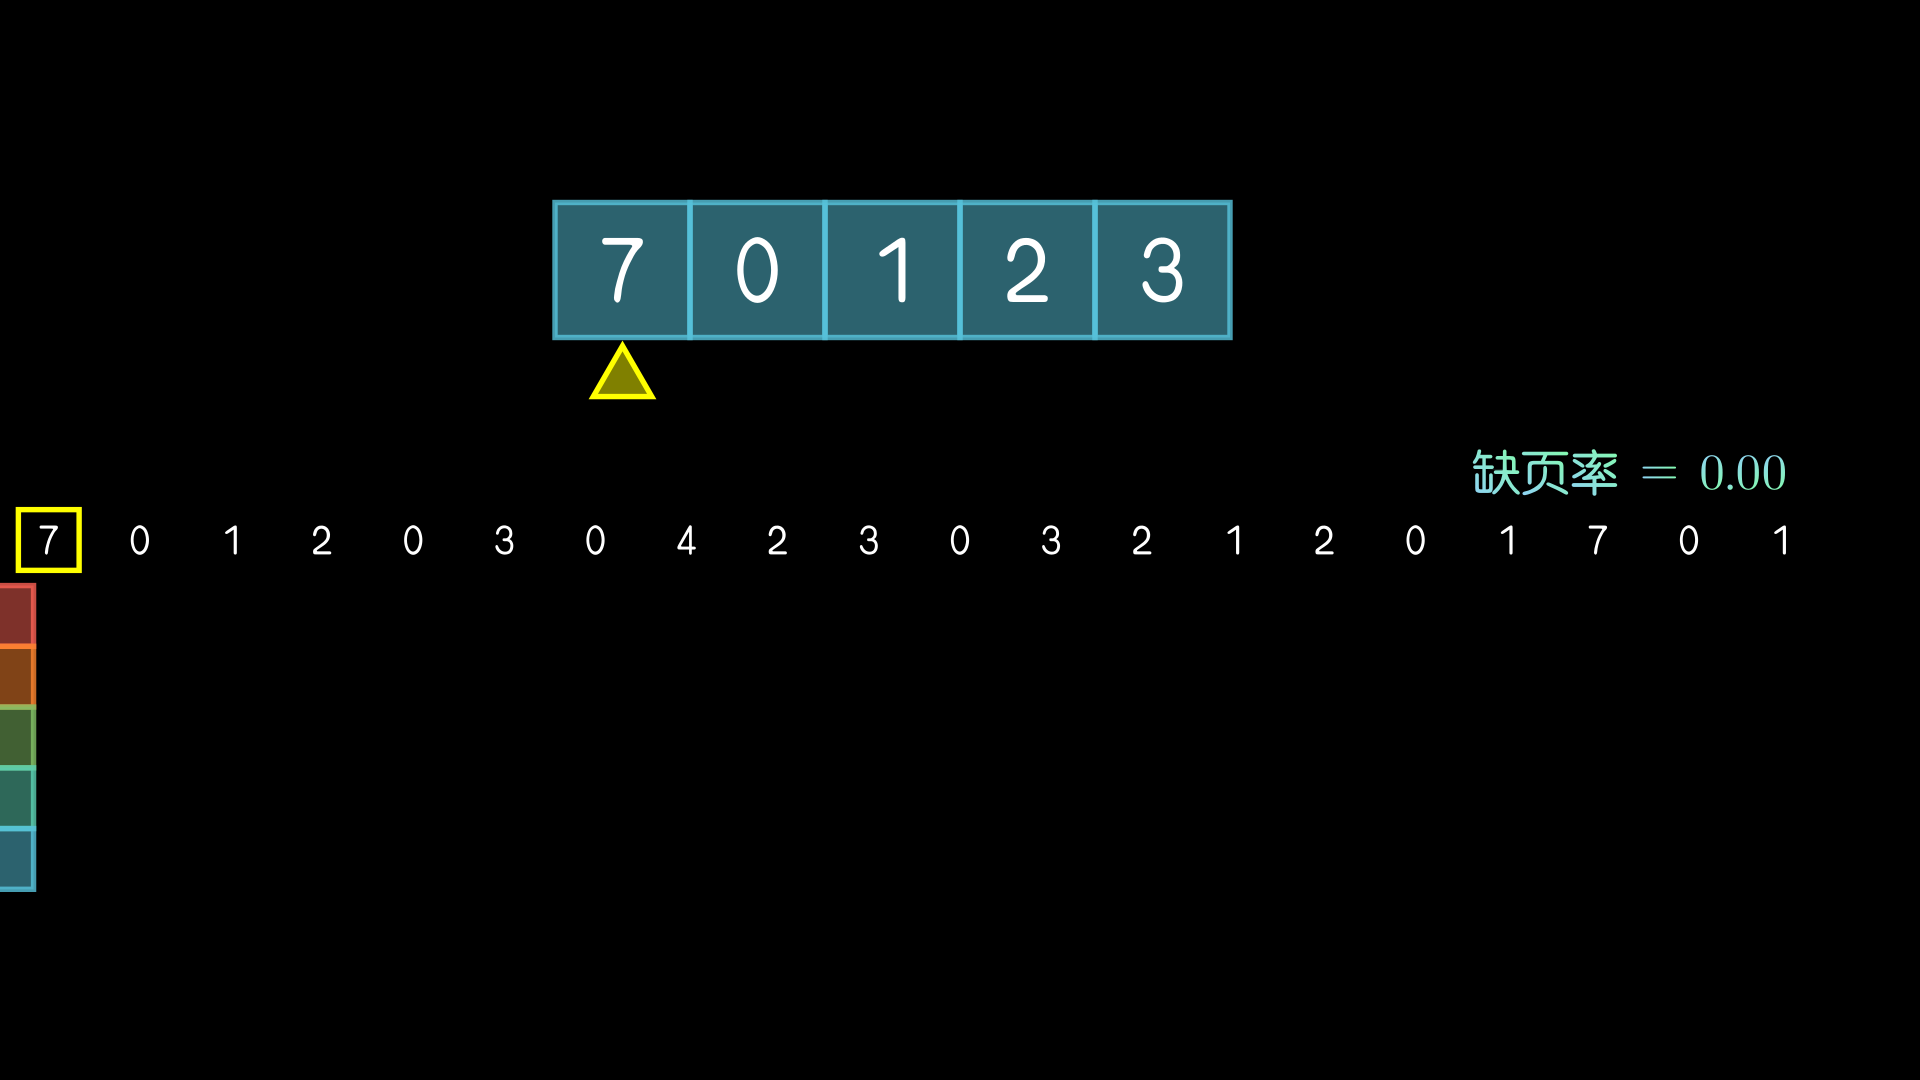

In [2]:
%%manim -qh -v WARNING DeBug
class DeBug(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        s = ClockPageReplacement(input_lst,page_frame_num=5)
        self.add(s)

In [1]:
%%manim -qh -v WARNING PageTest
class PageTest(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3," "]
        p = FifoPageReplacement(input_lst,page_frame_num=3)
        self.add(p)
        self.wait()
        for i in range(len(input_lst)-1):
            p.step_on(self,i,0.5)

UsageError: Cell magic `%%manim` not found.


In [ ]:
%%manim -qh -v WARNING PageInit
class PageInit(Scene):
    def construct(self):
        input_lst = [7,0,1,2,0,3,0,4,2,3,0,3,2,1,2,0,1,7,0,1," "]
        p = Page(input_lst,page_frame_num=3)
        self.add(p)

In [ ]:
%%manim -qh -v WARNING ScreenTest
class ScreenTest(Scene):
    def construct(self):
        text_list = [
            "Hello World",
            "Hell Worl",
            "Hel Wor",
            "He Wo",
        ]
        s = ScreenCycle(text_list)
        self.add(s)
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())
        self.play(s.animate.set_to_edge(UL))
        self.play(s.animate.set_back())
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())
        self.play(s.animate.step_forward())

In [7]:
%%manim -qh -v WARNING StackTest
class StackTest(Scene):
    def construct(self):
        s = SquTexSlide("0",font=text_font[0],**typedict["default_type"]).shift(LEFT*2)
        color_lst = [GREEN,RED,PURPLE,YELLOW]
        self.add(s)
        for i in range(4):
            self.play(
                *s.push(i+1),
                s[-1].animate.set_color(color_lst[i])
            )
            self.play(*s.slide_fade(-1))
            

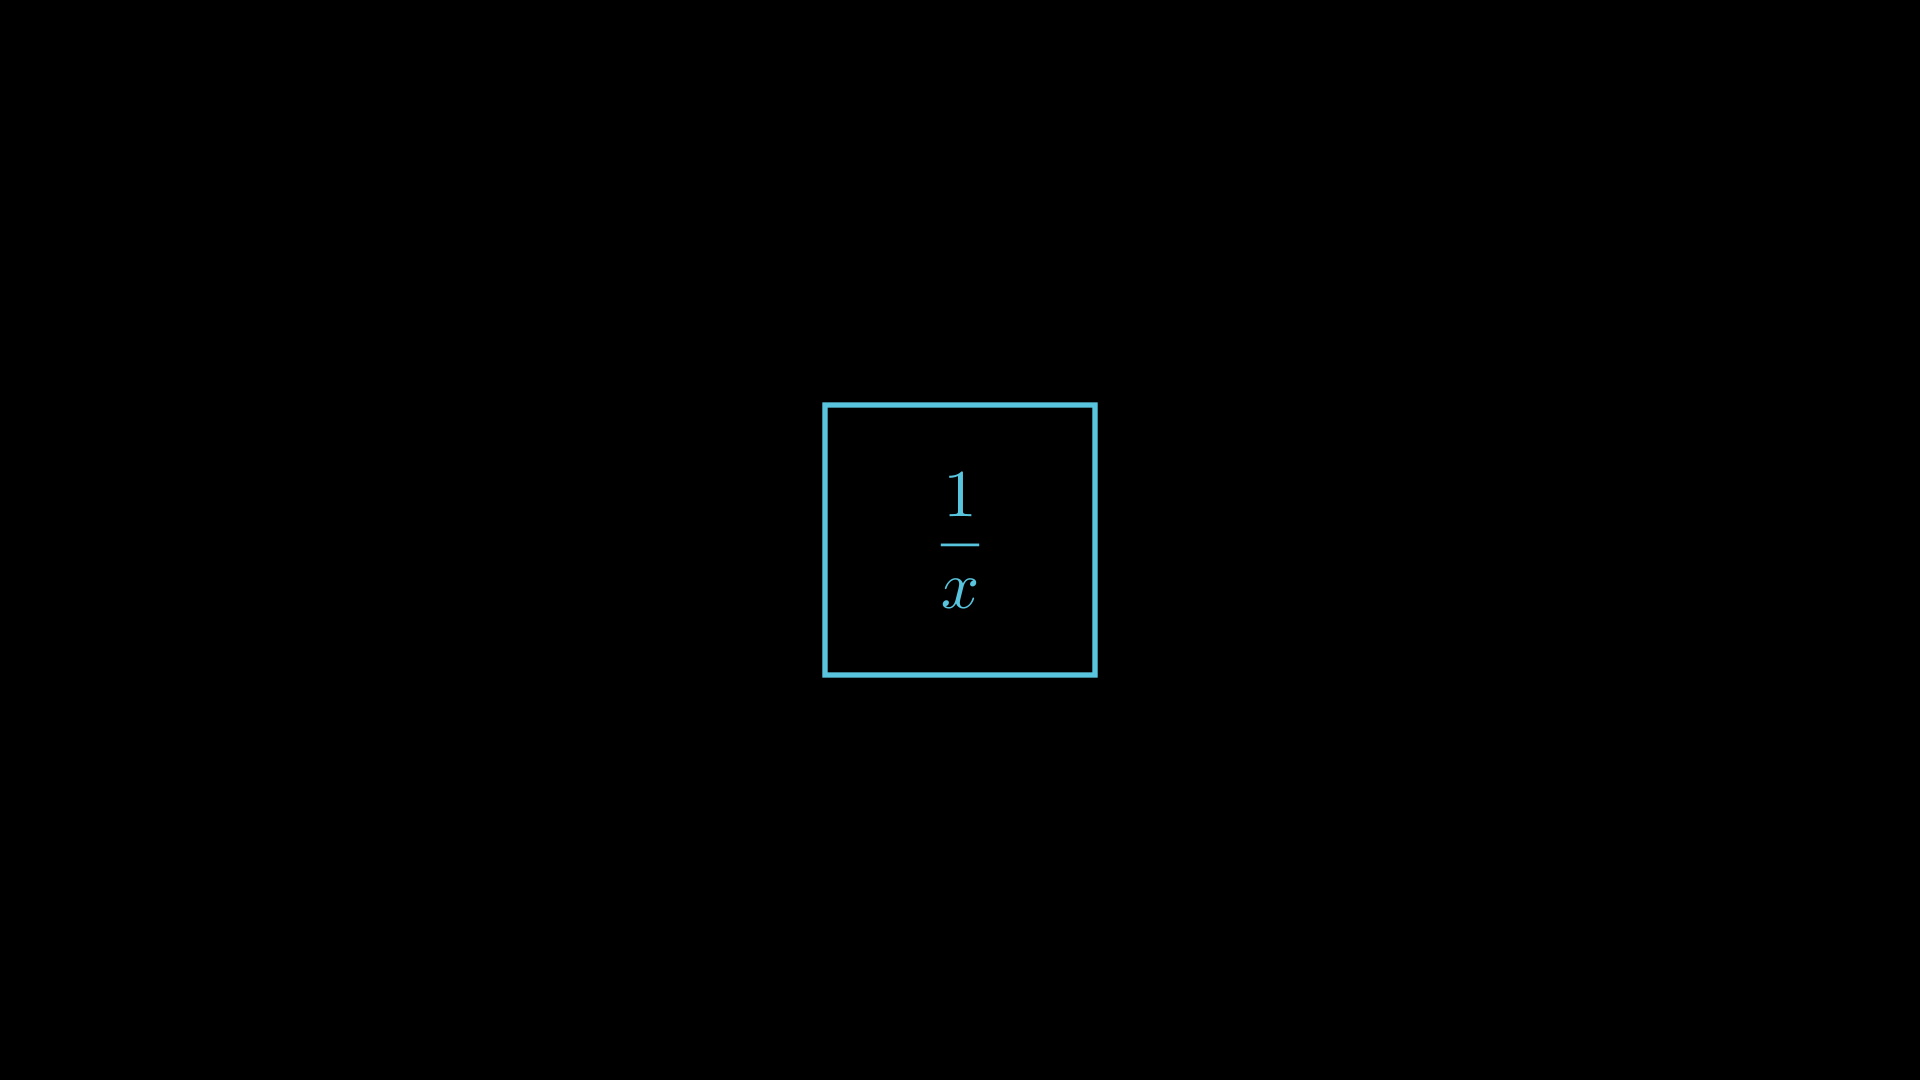

In [3]:
%%manim -qh -v WARNING StackTex
class StackTex(Scene):
    def construct(self):
        s = SquTexSlide("\\frac{1}{x}",text_type=MathTex,str_need_split=True).set_color(BLUE)
        self.add(s)

In [10]:
%%manim -qh -v WARNING ComplexIntegralStepByStep

class ComplexIntegralStepByStep(Scene):
    def construct(self):
        # 创建文本来展示积分的不同步骤
        integral_start = MathTex(r"I = \int x e^{x} \, dx")  # 初始积分公式
        integration_by_parts = MathTex(r"\text{Use integration by parts: } u = x, \, dv = e^{x} \, dx")  # 使用部分积分法
        parts_step1 = MathTex(r"u = x, \, du = dx, \, v = e^{x}, \, \int e^{x} dx = e^{x}")  # 部分积分法步骤1
        integral_result = MathTex(r"= x e^{x} - \int e^{x} dx")  # 部分积分后的式子
        final_result = MathTex(r"= x e^{x} - e^{x} + C")  # 最终结果

        # # 将文本放置在屏幕中
        # integral_start.to_edge(UP)
        # integration_by_parts.next_to(integral_start, DOWN)
        # parts_step1.next_to(integration_by_parts, DOWN)
        # integral_result.next_to(parts_step1, DOWN)
        # final_result.next_to(integral_result, DOWN)

        # 显示第一个步骤
        self.play(Write(integral_start))
        self.wait(2)

        # 使用Transform演示第一个步骤的转化
        self.play(Write(integration_by_parts.shift(UP)))
        self.wait(2)

        # 继续转换至第二步：部分积分法步骤
        self.play(Transform(integral_start, parts_step1))
        self.wait(2)

        # 部分积分后的积分式
        self.play(Transform(integral_start, integral_result))
        self.wait(2)

        # 最后一步，得到最终结果
        self.play(Transform(integral_start, final_result))
        self.wait(3)
